# NLP EDA

Basically, exploration and modeling boil down to a single question:

How do we quantify our data (/a document)?

In this lesson, we'll explore answers to this question that will aid in visualization.

- word frequency (by label)
- ngrams
- word cloud
- sentiment analysis
- other common features

## Setup

Data is spam/ham text messages.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

Data comes from https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [4]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

## Exploration

Represent text as word frequencies.

In [6]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [7]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? I.e. words present in one type of message but not the other?

In [8]:
# most frequent words
word_counts.sort_values('all', ascending=False).head()

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322


In [9]:
# spam

word_counts[word_counts['spam'] / word_counts['all'] > .75].sort_values('spam', ascending=False).head()

,ham,spam,all
free,59,216,275
txt,13,150,163
mobile,15,123,138
stop,37,113,150
claim,0,113,113


In [10]:
# ham

word_counts[word_counts['ham'] / word_counts['all'] > .75].head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
the,1118,204,1322
u,986,147,1133
and,848,122,970


### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

<AxesSubplot:>

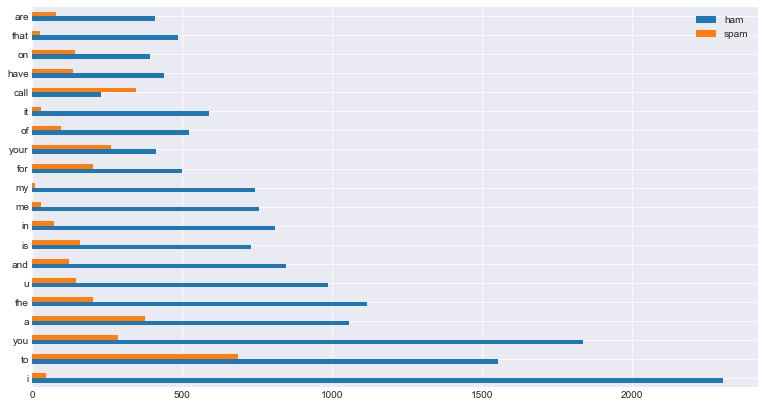

In [11]:
word_counts.sort_values('all', ascending=False).head(20)[['ham', 'spam']].plot.barh()

<AxesSubplot:>

<Figure size 1152x648 with 0 Axes>

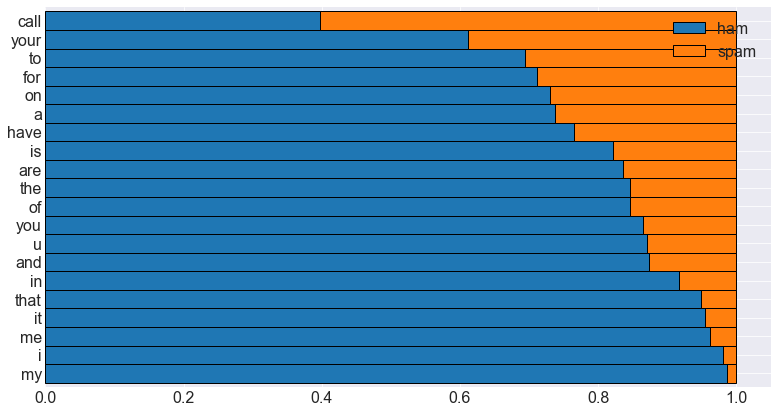

In [12]:
plt.figure(figsize=(16,9))
plt.rc('font', size=16)
(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='spam')
 .plot.barh(stacked=True, width=1, ec='black'))

## n-grams

**bigram**: combinations of 2 words

Represent text as combinations of 2 words

- what are the most common bigrams? spam bigrams? ham bigrams?
- visualize 20 most common bigrams, most common ham bigrams
- ngrams

Find the most common bigram and then find a representative text

In [13]:
sentence = 'Today is tuesday, and the weather is nice.'

In [14]:
list(nltk.bigrams(sentence.split()))

[('Today', 'is'),
 ('is', 'tuesday,'),
 ('tuesday,', 'and'),
 ('and', 'the'),
 ('the', 'weather'),
 ('weather', 'is'),
 ('is', 'nice.')]

<AxesSubplot:>

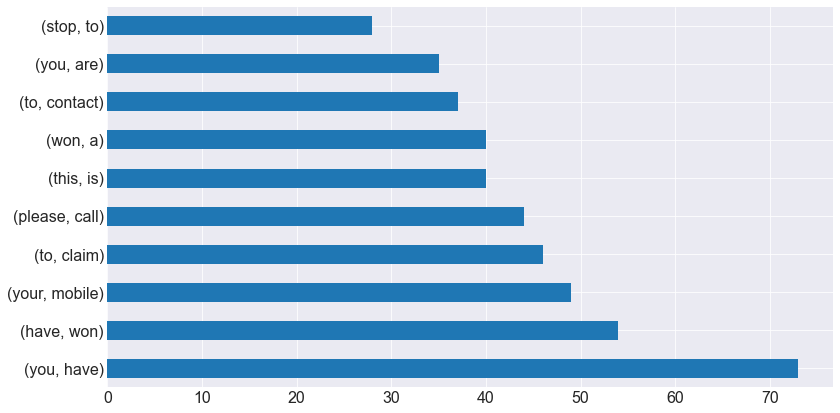

In [15]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()

## Word Cloud

(-0.5, 799.5, 599.5, -0.5)

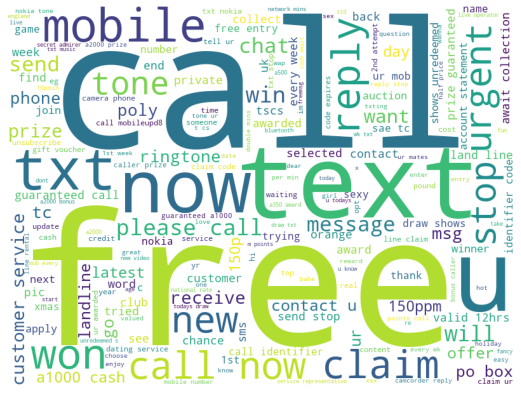

In [16]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

Create one or more of the above features and visualize it.

In [18]:
word_counts['all']

i            2350
you          2124
to           2240
the          1322
a            1431
             ... 
a1000call       1
4goten          1
sender          1
3680offer       1
busty           1
Name: all, Length: 9557, dtype: int64

## Sentiment

A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - valence scored wordlists
    - overall labels, measure is how well it compares to human judgement
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf))
    - Vader ([whitepaper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf) `nltk.sentiment.vader.SentimentIntensityAnalyzer`)


In [25]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores('The drinks taste like hotdog water.')

{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

Apply this to the text message data

## More Resources

- [kaggle wikipedia movie plots](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)
    - Suggestion: narrow to top n genres that aren't unknown
- [wikitable extractor](https://wikitable2csv.ggor.de/) (Try with, e.g. [helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes))
- [Textblob library](https://textblob.readthedocs.io/en/dev/)